<a href="https://colab.research.google.com/github/abhi005/human-facial-expression-recognition/blob/main/Human_Facial_Expression_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import zlib
import copy
import seaborn as sns
from scipy import signal, ndimage
from scipy.signal import spectrogram, butter, sosfilt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from matplotlib import pyplot
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##Data preprocessing 

In [ ]:
data = pd.read_csv('/content/drive/My Drive/dataset/train.csv')

In [ ]:
data.head(-1)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
34881,0,181 177 176 156 178 144 136 132 122 107 131 16...
34882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
34883,3,178 174 172 173 181 188 191 194 196 199 200 20...
34884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...


In [ ]:
#label mapping
labels=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

In [ ]:
Y = data['emotion']
X = data.drop('emotion' ,axis=1)
X.head()

,pixels
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,151 150 147 155 148 133 111 140 170 174 182 15...
2,231 212 156 164 174 138 161 173 182 200 106 38...
3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
pixels=X.to_numpy()
print((pixels))

[['70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 

In [ ]:
# convert string to pixel arrays
images=[]
for i in range(34887):
  x=(pixels[i][0].split(" "))
  l=0
  a=np.zeros([48, 48])
  for j in range(48):
    for k in range(48):
      a[j][k]=x[l]
      l=l+1
  images.append(a)

images=np.array(images)
images=images.reshape(34887,48,48,1)


In [ ]:
print(type(images))

<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


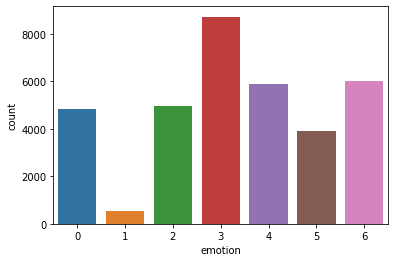

In [ ]:
data.emotion.value_counts()
sns.countplot(data.emotion)
pyplot.show()
# emotion description

In [ ]:
Y.head()

0    0
1    0
2    2
3    4
4    6
Name: emotion, dtype: int64

## Data Augementation

In [ ]:
#test train split
from sklearn.model_selection import train_test_split

train_x, test_x, train_y,test_y  = train_test_split(images, Y,shuffle=True, stratify=Y,test_size=0.2, random_state=42)

In [ ]:

# Normalizing results, as neural networks are very sensitive to unnormalized data.
train_x = train_x / 255.
test_x = test_x / 255.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(train_x)

In [ ]:
#model artitechture
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(48, 48,1 )))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(48, 48,1 )))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(layers.Dense(7))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 44, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 44, 44, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 40, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 18, 18, 128)       5

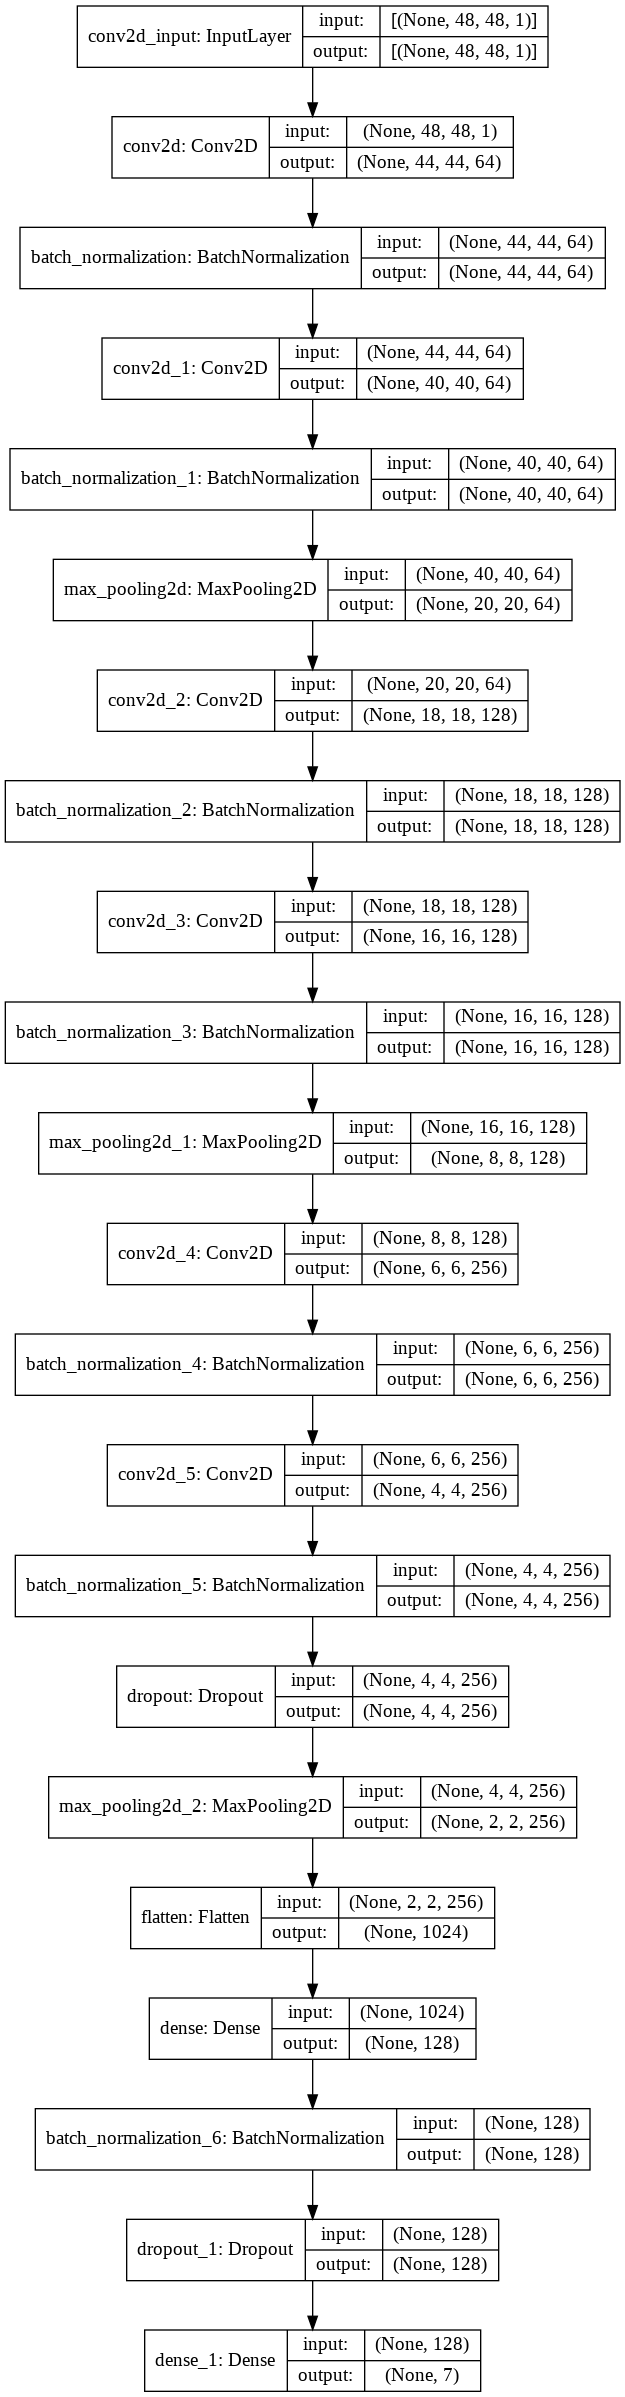

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
#optimization

from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)
# learning rate 
lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

# callbacks on lr and earlystop
callbacks = [
    early_stopping,
    lr_scheduler,
]

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
print(test_y)

31700    6
15091    2
29110    6
13646    3
33925    2
        ..
3209     3
484      4
708      5
33615    2
13945    0
Name: emotion, Length: 6978, dtype: int64


In [ ]:
# model training
batch_size = 32 
epochs = 100

history = model.fit_generator(
    train_datagen.flow(train_x, train_y, batch_size=batch_size),
    validation_data=(test_x, test_y),
    steps_per_epoch=len(train_x) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
872/872 [==============================] - 24s 19ms/step - loss: 2.4355 - accuracy: 0.2015 - val_loss: 1.8570 - val_accuracy: 0.2898
Epoch 2/100
872/872 [==============================] - 16s 18ms/step - loss: 1.7730 - accuracy: 0.2888 - val_loss: 1.6985 - val_accuracy: 0.3938
Epoch 3/100
872/872 [==============================] - 16s 18ms/step - loss: 1.5748 - accuracy: 0.3848 - val_loss: 1.5032 - val_accuracy: 0.4292
Epoch 4/100
872/872 [==============================] - 16s 18ms/step - loss: 1.4309 - accuracy: 0.4517 - val_loss: 1.4265 - val_accuracy: 0.4772
Epoch 5/100
872/872 [==============================] - 16s 18ms/step - loss: 1.3776 - accuracy: 0.4697 - val_loss: 1.3466 - val_accuracy: 0.5136
Epoch 6/100
872/872 [==============================] - 16s 18ms/step - loss: 1.3052 - accuracy: 0.5038 - val_loss: 1.3998 - val_accuracy: 0.4731
Epoch 7/100
872/872 [==============================] - 16s 18ms/step - loss: 1.2805 - accuracy: 0.5124 - val_loss: 1.2687 - val_ac

In [ ]:

loss_v, accuracy_v = model.evaluate(test_x, test_y, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
model.save("model.h5")

219/219 [==============================] - 1s 5ms/step - loss: 0.9243 - accuracy: 0.6754
Validation: accuracy = 0.675408  ;  loss_v = 0.924252


## experimental:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

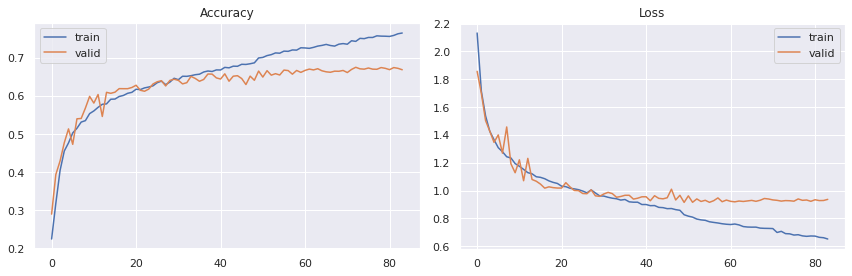

In [ ]:
import seaborn as sns
from matplotlib import pyplot
sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('epoch_history_cnn.png')
pyplot.show()

In [ ]:
model.save_weights('fweights.h5')

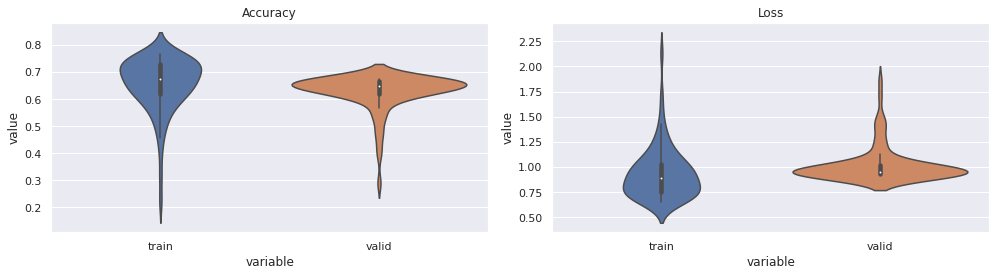

In [ ]:
df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})

fig = pyplot.figure(0, (14, 4))
ax = pyplot.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), showfliers=False)
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), showfliers=False)
pyplot.title('Loss')
pyplot.tight_layout()

In [ ]:
y_pred=model.predict_classes(test_x)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.63      0.62      0.62       965
           1       0.78      0.51      0.62       106
           2       0.52      0.48      0.50       992
           3       0.88      0.86      0.87      1745
           4       0.53      0.60      0.56      1181
           5       0.79      0.77      0.78       783
           6       0.64      0.64      0.64      1206

    accuracy                           0.68      6978
   macro avg       0.68      0.64      0.65      6978
weighted avg       0.68      0.68      0.68      6978



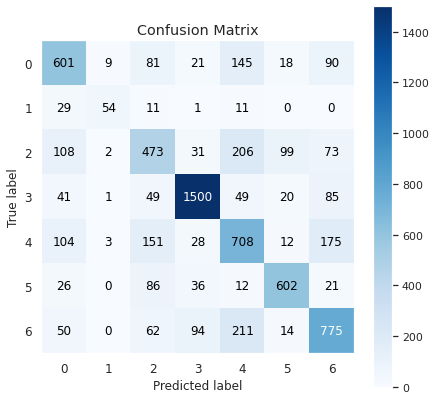

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
! pip install scikit-plot
import scikitplot
scikitplot.metrics.plot_confusion_matrix(test_y, y_pred, figsize=(7,7))
print(classification_report(test_y, y_pred))